# How to properly prevent overfitting

**Objective**
- Give a validation set to the model
- Use the stopping criterion to prevent the Neural network from overfitting
- Regularize your network

## Data 

First, let's generate some data thanks to the [`make_blob`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) function that we used yesterday.

❓ **Question** ❓ Generate 2000 samples, with 10 features each. There should be 8 classes of blobs (`centers` argument), wich `cluster_std` equal to 7. Plot some dimensions to check your data.

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
X, y = make_blobs(n_samples=2000, n_features=10, centers=8, cluster_std=7)

In [9]:
X.shape, y.shape

((2000, 10), (2000,))

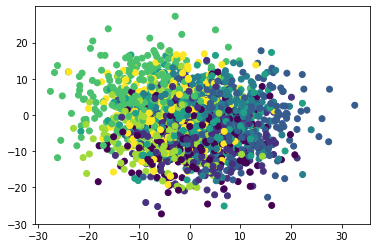

In [17]:
plt.scatter(X[:, 3], X[:, 8], c=y);

❓ **Question** ❓ Use the `to_categorical` function from `tensorflow` to convert `y` to `y_cat` which is the categorical representation of `y` with one-hot encoding columns.

In [19]:
import pandas as pd

In [25]:
pd.DataFrame(y).nunique()

0    8
dtype: int64

In [18]:
from tensorflow.keras.utils import to_categorical 

In [43]:
y_cat = to_categorical(y, num_classes=8)
y_cat.shape

(2000, 8)


## Part I : Proper cross-validation

In a previous challenge, we split the dataset into a train and a test set at the beginning of the notebook. And then, we started to build different models which were trained on the train set but evaluated on the test set.

So, at the end of the day, we used the test set as many times as we evaluated our models and different hyperparameters. We therefore _used_ the test set to select our best model, which is a sort of overfitting.

A first good practice is to avoid using `random_state` or any deterministic separation between your train and test set. In that case, your test set will change everytime you re-run your notebook. But this is far from being sufficient.

To properly compare models, you have to run a proper cross-validation, a 10-fold split for instance. Let's see how to do it properly.

❓ **Question** ❓ First, write a function that outputs a neural network with 3 layers
- a layer with 25 neurons, the `relu` activation function and the appropriate `input_dim`
- a layer with 10 neurons and the `relu` activation function.
- a last layer which is suited to the problem at hand (multiclass classification)

The function should include its compilation, with the `categorical_crossentropy` loss, the `adam` optimizer and the `accuracy` metrics.

In [28]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [29]:
def initialize_model():
    model = models.Sequential()
    
    model.add(layers.Dense(25, activation='relu', input_dim=10))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(8, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [32]:
model = initialize_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 25)                275       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 88        
Total params: 623
Trainable params: 623
Non-trainable params: 0
_________________________________________________________________


Here, we will do a proper cross validation.

❓ **Question** ❓ Write a loop thanks to the [K-Fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) function of Scikit-Learn (select 10 splits) to fit your model on the train data, and evaluate it on the test data. Store the result of the evaluation in the `results` variable.

Do not forget to standardize your train data before fitting the neural network.
Also, 150 epochs shoul be sufficient in a first approximation

In [34]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [35]:
kf = KFold(n_splits=10)
kf.get_n_splits(X)

results = []

for train_index, test_index in kf.split(X):

    # Split the data into train and test
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_cat[train_index], y_cat[test_index]
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Initialize the model
    model = initialize_model() 
    
    # Fit the model on the train data
    model.fit(X_train, 
              y_train,
              epochs=150)
    
    # Evaluate the model on the test data and append the result in the `results` variable
    results.append(model.evaluate(X_test, y_test))
    
results

TRAIN: [ 200  201  202 ... 1997 1998 1999] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]
Epoch 1/150
57/57 [==============================] - 1s 2ms/step - loss: 2.0608 - accuracy: 0.1989
Epoch 2/150
57/57 [====================

57/57 [==============================] - 0s 2ms/step - loss: 0.5266 - accuracy: 0.8156
Epoch 75/150
57/57 [==============================] - 0s 2ms/step - loss: 0.5262 - accuracy: 0.8043
Epoch 76/150
57/57 [==============================] - 0s 2ms/step - loss: 0.5548 - accuracy: 0.7918
Epoch 77/150
57/57 [==============================] - 0s 2ms/step - loss: 0.5472 - accuracy: 0.8020
Epoch 78/150
57/57 [==============================] - 0s 2ms/step - loss: 0.5613 - accuracy: 0.7962
Epoch 79/150
57/57 [==============================] - 0s 2ms/step - loss: 0.5490 - accuracy: 0.7976
Epoch 80/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5173 - accuracy: 0.8130
Epoch 81/150
57/57 [==============================] - 0s 2ms/step - loss: 0.5388 - accuracy: 0.8034
Epoch 82/150
57/57 [==============================] - 0s 2ms/step - loss: 0.5414 - accuracy: 0.8041
Epoch 83/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5136 - accuracy: 0.8105
Epoch 84/150


Epoch 1/150
57/57 [==============================] - 1s 7ms/step - loss: 2.1447 - accuracy: 0.0856
Epoch 2/150
57/57 [==============================] - 0s 2ms/step - loss: 1.9492 - accuracy: 0.2372
Epoch 3/150
57/57 [==============================] - 0s 2ms/step - loss: 1.7721 - accuracy: 0.4036
Epoch 4/150
57/57 [==============================] - 0s 2ms/step - loss: 1.5344 - accuracy: 0.5072
Epoch 5/150
57/57 [==============================] - 0s 2ms/step - loss: 1.3126 - accuracy: 0.5787
Epoch 6/150
57/57 [==============================] - 0s 2ms/step - loss: 1.1216 - accuracy: 0.6466
Epoch 7/150
57/57 [==============================] - 0s 4ms/step - loss: 0.9749 - accuracy: 0.6838
Epoch 8/150
57/57 [==============================] - 0s 2ms/step - loss: 0.8815 - accuracy: 0.7174
Epoch 9/150
57/57 [==============================] - 0s 2ms/step - loss: 0.8081 - accuracy: 0.7247
Epoch 10/150
57/57 [==============================] - 0s 2ms/step - loss: 0.7295 - accuracy: 0.7507
Epoch 11/

57/57 [==============================] - 0s 2ms/step - loss: 0.5055 - accuracy: 0.8148
Epoch 83/150
57/57 [==============================] - 0s 2ms/step - loss: 0.5009 - accuracy: 0.8140
Epoch 84/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4719 - accuracy: 0.8315
Epoch 85/150
57/57 [==============================] - 0s 3ms/step - loss: 0.4656 - accuracy: 0.8301
Epoch 86/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4849 - accuracy: 0.8216
Epoch 87/150
57/57 [==============================] - 0s 2ms/step - loss: 0.4854 - accuracy: 0.8178
Epoch 88/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4709 - accuracy: 0.8402
Epoch 89/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5206 - accuracy: 0.8036
Epoch 90/150
57/57 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.8157
Epoch 91/150
57/57 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.8190
Epoch 92/150


57/57 [==============================] - 0s 2ms/step - loss: 1.3894 - accuracy: 0.5610
Epoch 5/150
57/57 [==============================] - 0s 2ms/step - loss: 1.1713 - accuracy: 0.6277
Epoch 6/150
57/57 [==============================] - 0s 2ms/step - loss: 0.9971 - accuracy: 0.6547
Epoch 7/150
57/57 [==============================] - 0s 1ms/step - loss: 0.8669 - accuracy: 0.7153
Epoch 8/150
57/57 [==============================] - 0s 1ms/step - loss: 0.8306 - accuracy: 0.7348
Epoch 9/150
57/57 [==============================] - 0s 2ms/step - loss: 0.7597 - accuracy: 0.7544
Epoch 10/150
57/57 [==============================] - 0s 1ms/step - loss: 0.7247 - accuracy: 0.7529
Epoch 11/150
57/57 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.7723
Epoch 12/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6429 - accuracy: 0.7861
Epoch 13/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6784 - accuracy: 0.7635
Epoch 14/150
57/57

57/57 [==============================] - 0s 2ms/step - loss: 0.5066 - accuracy: 0.8184
Epoch 86/150
57/57 [==============================] - 0s 4ms/step - loss: 0.5146 - accuracy: 0.8135
Epoch 87/150
57/57 [==============================] - 0s 2ms/step - loss: 0.4990 - accuracy: 0.8177
Epoch 88/150
57/57 [==============================] - 0s 2ms/step - loss: 0.5217 - accuracy: 0.8035
Epoch 89/150
57/57 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.8240
Epoch 90/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4844 - accuracy: 0.8190
Epoch 91/150
57/57 [==============================] - 0s 2ms/step - loss: 0.5322 - accuracy: 0.8058
Epoch 92/150
57/57 [==============================] - 0s 2ms/step - loss: 0.4970 - accuracy: 0.8150
Epoch 93/150
57/57 [==============================] - 0s 2ms/step - loss: 0.4974 - accuracy: 0.8018
Epoch 94/150
57/57 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.8079
Epoch 95/150


57/57 [==============================] - 0s 2ms/step - loss: 1.0109 - accuracy: 0.6816
Epoch 7/150
57/57 [==============================] - 0s 2ms/step - loss: 0.8918 - accuracy: 0.7161
Epoch 8/150
57/57 [==============================] - 0s 2ms/step - loss: 0.8716 - accuracy: 0.7074
Epoch 9/150
57/57 [==============================] - 0s 2ms/step - loss: 0.7501 - accuracy: 0.7492
Epoch 10/150
57/57 [==============================] - 0s 2ms/step - loss: 0.7064 - accuracy: 0.7643
Epoch 11/150
57/57 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.7766
Epoch 12/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6416 - accuracy: 0.7854
Epoch 13/150
57/57 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 0.7756
Epoch 14/150
57/57 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.7673
Epoch 15/150
57/57 [==============================] - 0s 2ms/step - loss: 0.6318 - accuracy: 0.7669
Epoch 16/150
57/

57/57 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.8193
Epoch 88/150
57/57 [==============================] - 0s 2ms/step - loss: 0.5236 - accuracy: 0.8123
Epoch 89/150
57/57 [==============================] - 0s 2ms/step - loss: 0.5254 - accuracy: 0.8076
Epoch 90/150
57/57 [==============================] - 0s 2ms/step - loss: 0.5189 - accuracy: 0.8163
Epoch 91/150
57/57 [==============================] - 0s 2ms/step - loss: 0.5301 - accuracy: 0.8038
Epoch 92/150
57/57 [==============================] - 0s 8ms/step - loss: 0.5080 - accuracy: 0.8213
Epoch 93/150
57/57 [==============================] - 0s 6ms/step - loss: 0.5116 - accuracy: 0.8163
Epoch 94/150
57/57 [==============================] - 1s 9ms/step - loss: 0.4902 - accuracy: 0.8188
Epoch 95/150
57/57 [==============================] - 0s 6ms/step - loss: 0.4775 - accuracy: 0.8329
Epoch 96/150
57/57 [==============================] - 1s 17ms/step - loss: 0.4856 - accuracy: 0.8295 0s - loss: 0

57/57 [==============================] - 0s 2ms/step - loss: 0.7840 - accuracy: 0.7528
Epoch 9/150
57/57 [==============================] - 0s 2ms/step - loss: 0.7051 - accuracy: 0.7786
Epoch 10/150
57/57 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.7694
Epoch 11/150
57/57 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.7675
Epoch 12/150
57/57 [==============================] - 0s 2ms/step - loss: 0.6510 - accuracy: 0.7837
Epoch 13/150
57/57 [==============================] - 0s 7ms/step - loss: 0.6306 - accuracy: 0.7884
Epoch 14/150
57/57 [==============================] - 0s 4ms/step - loss: 0.6078 - accuracy: 0.7907
Epoch 15/150
57/57 [==============================] - 0s 2ms/step - loss: 0.6153 - accuracy: 0.7912
Epoch 16/150
57/57 [==============================] - 0s 2ms/step - loss: 0.6141 - accuracy: 0.7852
Epoch 17/150
57/57 [==============================] - 0s 2ms/step - loss: 0.5743 - accuracy: 0.7979
Epoch 18/150
5

57/57 [==============================] - 0s 2ms/step - loss: 0.5012 - accuracy: 0.8308
Epoch 90/150
57/57 [==============================] - 0s 2ms/step - loss: 0.5011 - accuracy: 0.8249
Epoch 91/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5170 - accuracy: 0.8200
Epoch 92/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4652 - accuracy: 0.8314
Epoch 93/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4750 - accuracy: 0.8335
Epoch 94/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4937 - accuracy: 0.8186
Epoch 95/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5328 - accuracy: 0.8070
Epoch 96/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4717 - accuracy: 0.8276
Epoch 97/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4921 - accuracy: 0.8163
Epoch 98/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5037 - accuracy: 0.8259
Epoch 99/150


57/57 [==============================] - 0s 2ms/step - loss: 0.7502 - accuracy: 0.7637
Epoch 10/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6641 - accuracy: 0.7803
Epoch 11/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.7622
Epoch 12/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6358 - accuracy: 0.7812
Epoch 13/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6304 - accuracy: 0.7840
Epoch 14/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5991 - accuracy: 0.7986
Epoch 15/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5987 - accuracy: 0.7849
Epoch 16/150
57/57 [==============================] - 0s 2ms/step - loss: 0.6230 - accuracy: 0.7813
Epoch 17/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6149 - accuracy: 0.7818
Epoch 18/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6144 - accuracy: 0.7903
Epoch 19/150


57/57 [==============================] - 0s 1ms/step - loss: 0.5294 - accuracy: 0.8137
Epoch 92/150
57/57 [==============================] - 0s 2ms/step - loss: 0.5145 - accuracy: 0.8269
Epoch 93/150
57/57 [==============================] - 0s 2ms/step - loss: 0.5057 - accuracy: 0.8183
Epoch 94/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4915 - accuracy: 0.8224
Epoch 95/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4935 - accuracy: 0.8193
Epoch 96/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5093 - accuracy: 0.8283
Epoch 97/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5372 - accuracy: 0.8072
Epoch 98/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5240 - accuracy: 0.8170
Epoch 99/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4982 - accuracy: 0.8297
Epoch 100/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5113 - accuracy: 0.8205
Epoch 101/15

57/57 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.7744
Epoch 12/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6321 - accuracy: 0.7810
Epoch 13/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5981 - accuracy: 0.7844
Epoch 14/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6344 - accuracy: 0.7738
Epoch 15/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6125 - accuracy: 0.7803
Epoch 16/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6226 - accuracy: 0.7729
Epoch 17/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5963 - accuracy: 0.7888
Epoch 18/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5789 - accuracy: 0.7885
Epoch 19/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6081 - accuracy: 0.7792
Epoch 20/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6112 - accuracy: 0.7872
Epoch 21/150


57/57 [==============================] - 0s 2ms/step - loss: 0.5238 - accuracy: 0.8035
Epoch 94/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5142 - accuracy: 0.8096
Epoch 95/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4926 - accuracy: 0.8214
Epoch 96/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5325 - accuracy: 0.7987
Epoch 97/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5046 - accuracy: 0.8075
Epoch 98/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5398 - accuracy: 0.7998
Epoch 99/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4906 - accuracy: 0.8276
Epoch 100/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5337 - accuracy: 0.8049
Epoch 101/150
57/57 [==============================] - 0s 2ms/step - loss: 0.5052 - accuracy: 0.8175
Epoch 102/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4736 - accuracy: 0.8353
Epoch 103/

57/57 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.7598
Epoch 14/150
57/57 [==============================] - 0s 1ms/step - loss: 0.7126 - accuracy: 0.7374
Epoch 15/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6480 - accuracy: 0.7793
Epoch 16/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6558 - accuracy: 0.7729
Epoch 17/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6289 - accuracy: 0.7872
Epoch 18/150
57/57 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.7778
Epoch 19/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6436 - accuracy: 0.7764
Epoch 20/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5991 - accuracy: 0.7895
Epoch 21/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5765 - accuracy: 0.8019
Epoch 22/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5917 - accuracy: 0.7930
Epoch 23/150


57/57 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.8144
Epoch 96/150
57/57 [==============================] - 0s 2ms/step - loss: 0.4991 - accuracy: 0.8289
Epoch 97/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4802 - accuracy: 0.8362
Epoch 98/150
57/57 [==============================] - 0s 2ms/step - loss: 0.5111 - accuracy: 0.8125
Epoch 99/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5236 - accuracy: 0.8241
Epoch 100/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4968 - accuracy: 0.8328
Epoch 101/150
57/57 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.8393
Epoch 102/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4869 - accuracy: 0.8340
Epoch 103/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5015 - accuracy: 0.8281
Epoch 104/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5078 - accuracy: 0.8155
Epoch 10

57/57 [==============================] - 0s 2ms/step - loss: 0.6473 - accuracy: 0.7778
Epoch 16/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5993 - accuracy: 0.7936
Epoch 17/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6055 - accuracy: 0.7912
Epoch 18/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6388 - accuracy: 0.7738
Epoch 19/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6127 - accuracy: 0.7796
Epoch 20/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6302 - accuracy: 0.7820
Epoch 21/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5887 - accuracy: 0.7926
Epoch 22/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5772 - accuracy: 0.8016
Epoch 23/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5949 - accuracy: 0.7791
Epoch 24/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5631 - accuracy: 0.7963
Epoch 25/150


57/57 [==============================] - 0s 1ms/step - loss: 0.5227 - accuracy: 0.8118
Epoch 98/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4721 - accuracy: 0.8318
Epoch 99/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5014 - accuracy: 0.8298
Epoch 100/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4959 - accuracy: 0.8180
Epoch 101/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4825 - accuracy: 0.8248
Epoch 102/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4818 - accuracy: 0.8297
Epoch 103/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4885 - accuracy: 0.8255
Epoch 104/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4944 - accuracy: 0.8283
Epoch 105/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.8180
Epoch 106/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4951 - accuracy: 0.8268
Epoch 

57/57 [==============================] - 0s 1ms/step - loss: 0.5868 - accuracy: 0.7854
Epoch 18/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6002 - accuracy: 0.7887
Epoch 19/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6212 - accuracy: 0.7846
Epoch 20/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6317 - accuracy: 0.7855
Epoch 21/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5888 - accuracy: 0.7942
Epoch 22/150
57/57 [==============================] - 0s 1ms/step - loss: 0.6025 - accuracy: 0.7900
Epoch 23/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5796 - accuracy: 0.7997
Epoch 24/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5742 - accuracy: 0.8076
Epoch 25/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5591 - accuracy: 0.8036
Epoch 26/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5888 - accuracy: 0.7985
Epoch 27/150


57/57 [==============================] - 0s 1ms/step - loss: 0.5342 - accuracy: 0.8121
Epoch 100/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5049 - accuracy: 0.8215
Epoch 101/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5003 - accuracy: 0.8104
Epoch 102/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5033 - accuracy: 0.8178
Epoch 103/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4850 - accuracy: 0.8230
Epoch 104/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5176 - accuracy: 0.8071
Epoch 105/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4892 - accuracy: 0.8218
Epoch 106/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5047 - accuracy: 0.8142
Epoch 107/150
57/57 [==============================] - 0s 1ms/step - loss: 0.4917 - accuracy: 0.8143
Epoch 108/150
57/57 [==============================] - 0s 1ms/step - loss: 0.5272 - accuracy: 0.8134
Epoc

[[0.6207223534584045, 0.7599999904632568],
 [0.8374118804931641, 0.7250000238418579],
 [0.7486841082572937, 0.7649999856948853],
 [0.6954187154769897, 0.7400000095367432],
 [0.8531550765037537, 0.7450000047683716],
 [0.6921131014823914, 0.7699999809265137],
 [0.6108787655830383, 0.7850000262260437],
 [0.7548871636390686, 0.7599999904632568],
 [0.6080772280693054, 0.7699999809265137],
 [0.7495566606521606, 0.7450000047683716]]

In [36]:
results

[[0.6207223534584045, 0.7599999904632568],
 [0.8374118804931641, 0.7250000238418579],
 [0.7486841082572937, 0.7649999856948853],
 [0.6954187154769897, 0.7400000095367432],
 [0.8531550765037537, 0.7450000047683716],
 [0.6921131014823914, 0.7699999809265137],
 [0.6108787655830383, 0.7850000262260437],
 [0.7548871636390686, 0.7599999904632568],
 [0.6080772280693054, 0.7699999809265137],
 [0.7495566606521606, 0.7450000047683716]]

❓ **Question** ❓ Print the mean accuracy, and its standard deviation

In [42]:
mean, std = np.array(results)[1].mean(), np.array(results)[1].std()
mean, std

(0.781205952167511, 0.056205928325653076)

❗ **Remark** ❗ You probably encountered one of the drawback of using a proper cross-validation for a neural network: **it takes a lot of time**. Therefore, for the rest of deep-learning module, we will do **only one split**. But remember that this is not entirely correct and, for real-life applications and problems, you are encouraged to use a proper cross-validation technique.

❗ **Remark** ❗ In general, what practitioners do, is that they split only once, as you did. And once they get to the end of their optimization, they launch a real cross-validation at 6pm, go home and get the final results on the next day.

❓ **Question** ❓ For the rest of the exercise (and of the deep-learning module), split the dataset into train and test with a 70/30% training to test data ratio.



In [11]:
### YOUR CODE HERE

## Part II : Stop the learning before overfitting

Let's first show that if we train the model for too long, it will overfit the training data and will not be good on the test data.

❓ **Question** ❓ To do that, train the same neural network (do not forget to re-initialize it) with `validation_data=(X_test, y_test)` and 500 epochs. Store the history in the `history` variable.

In [13]:
### YOUR CODE HERE

❓ **Question** ❓ Evaluate the model on the test set and print the accuracy

In [15]:
### YOUR CODE HERE

❓ **Question** ❓ Plot the history of the model with the following function : 

In [39]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(13,5))
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Test'], loc='best')
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0,1))
    if title:
        fig.suptitle(title)

In [18]:
# YOUR CODE HERE

We clearly see that the number of epochs we choose has a great influence on the final results: 
- If not enough epochs, then the algorithm is not optimal as it has not converged yet. 
- On the other hand, if too many epochs, we overfit the training data and the algorithm does not generalize well on test data.

What we want is basically to stop the algorithm when the test loss is minimal (or the test accuracy is maximal).

Let's introduce the early stopping criterion which is a way to stop the epochs of the algorithm at a interesting epoch. It basically use part of the data to see if the test loss stops from improving. You cannot use the test data to check that, otherwise, it is some sort of data leakage. On the contrary, it uses a subset of the initial training data, called the **validation set**

It basically looks like the following : 

<img src="validation_set.png" alt="Validation set" style="height:350px;"/>

To split this data, we use, in the `fit` function, the `validation_split` keyword which sets the percentage of data from the initial training set used in the validation set. On top of that, we use the `callbacks` keyword to call the early stopping criterion at the end of each epoch. You can check additional information in the [documentation](https://www.tensorflow.org/guide/keras/train_and_evaluate)


❓ **Question** ❓ Launch the following code, plot the history and evaluate it on the test set

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping()

model = initialize_model()

# Fit the model on the train data
history = model.fit(X_train, y_train,
                    validation_split=0.3,
                    epochs=500,
                    batch_size=16, 
                    verbose=0, 
                    callbacks=[es])

In [20]:
# YOUR CODE HERE

❗ **Remark** ❗ The problem, with this type of approach, is that as soon as the loss of the validation set increases, the model stops. However, as neural network convergence is stochastic, it happens that the loss increases before decreasing again. For that reason, the Early Stopping criterion has the `patience` keyword that defines how many epochs without loss decrease you allow.

❓ **Question** ❓ Use the early stopping criterion with a patience of 30 epochs, plot the results and print the accuracy on the test set

In [21]:
### YOUR CODE HERE

❗ **Remark** ❗ The model continues to converge even though it has some loss increase and descrease. The number of patience epochs to select is highly related to the task at hand and there does not exist any general rule. 

❗ **Remark** ❗ In case you select a high patience, you might face the problem that the loss on the test set decrease a lot from the best position. To that end, the early stopping criterion allows you to stop the convergence _and_ restore the weights of the neural network when it had the best score on the validation set, thanks to the `restore_best_weights` that is set to `False` by default.

❓ **Question** ❓ Run the model with a early stopping criterion that enables to restore the best weights of the parameters, plot the loss and accuracy and print the accuracy on the test set

In [23]:
### YOUR CODE HERE

❗ **Remark 1** ❗ You can look at the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) to play with other parameters

❗ **Remark 2** ❗ No need to take a look at the epochs as long as it hit the stopping criterion. So, in the future, you should have a large number of epochs and the early stopping criterion has to stop the epochs. 

## Part III : Batch-size & Epochs

❓ **Question** ❓ Let's run the previous model with different batch sizes (with the early stopping criterion) and plot the results.

In [42]:
# RUN THIS CELL (it can take some time)

es = EarlyStopping(patience=20, restore_best_weights=True)

for batch_size in [1, 4, 32]:
    
    model = initialize_model()

    history = model.fit(X_train, y_train,
                        validation_split=0.3,
                        epochs=500,
                        batch_size=batch_size, 
                        verbose=0, 
                        callbacks=[es])

    results = model.evaluate(X_test, y_test, verbose=0)
    plot_loss_accuracy(history, title=f'------ BATCH SIZE {batch_size} ------\n The accuracy on the test set is of {results[1]:.2f}')

❓ **Question** ❓ Look at the oscillations of the accuracy and loss with respect to the batch size number. Is this coherent with what we saw with the Tensorflow Playground? 

In [26]:
# YOUR ANSWER

❓ **Question** ❓ How many optimizations of the weight are they within one epoch, with respect to the number of data and the batch size? Therefore, is one epoch longer with a large or a small bacth size?

# Part IV: Regularization

In this part of the notebook, we will see how to use regularizers in a neural network. Regularizers are used to prevent overfitting that can happen because very complex networks have many many parameters which tends to overfit the training data.

First, let's initialize a model that has too many parameters for the task (many layers and/or many neurons) such that it overfits the training data  
**To better see the effect, we will not use any early stopping criterion**

In [34]:
# RUN THIS CELL

model = models.Sequential()
model.add(layers.Dense(25, activation='relu', input_dim=10))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

# Model compilation
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,  validation_split=0.3,
                    epochs=300, batch_size=batch_size, verbose=0)

results = model.evaluate(X_test, y_test, verbose=0)
print(f'The accuracy on the test set is of {results[1]:.2f}')
plot_loss_accuracy(history)

☝️ In our overparametrized network, some neurons got too specific to given training data, preventing the network from generalizing to new data. This lead to some overfitting. 

For that reason, we will use 
- [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layers, whose role is to _cancel_ the output of some neurons  during the training part. By doing this at random, it prevents the network from getting too specific to the input data : no any neuron can be too specific to a given input as its output is sometimes cancelled by the dropout layer. Overall, it forces the information that is contain in one input sample to go through multiple neurons instead of only one specific.

- [`Regularizers`](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers), as in linear regression regularization where the weights of the linear regression are constrained by L1, L2 or L1 and L2 norms.

❓ **Question** ❓ Try adding dropout layers and regularization to all your layers of the above neural network and look at the effect on the loss on the test set.

🏁 **Congratulation** 

Don't forget to commit and push your challenge